## Section 02. 머신러닝 맛보기 - (1) 분류문제

### 1. 분석 데이터 검토

In [2]:
import pandas as pd
data = pd.read_csv('breast-cancer-wisconsin.csv', encoding = 'utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [3]:
data['Class'].value_counts(sort=False)   #sort=False는 내림차순이 아닌 인덱스값으로 정렬

0    444
1    239
Name: Class, dtype: int64

In [4]:
print(data.shape)   #행과 열의 구조 확인

(683, 11)


### 2. 특성(x)와 레이블(y) 나누기

In [5]:
# 방법 1: 특성 이름으로 특성 데이터셋(X) 나누기
X1 = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
          'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]

# 방법 2: 특성 위치값으로 특성 데이터셋(X) 나누기
X2 = data[data.columns[1:10]]

# 방법 3: loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함.)
X3 = data.loc[:, 'Clump_Thickness':'Mitoses']

In [7]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(683, 9)
(683, 9)
(683, 9)


In [8]:
# 레이블 데이터셋(y) 나누기

y = data[["Class"]]

In [9]:
print(y.shape)

(683, 1)


### 3. train-test 데이터셋 나누기

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify = y, random_state = 42)

In [11]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


### 4. 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

#### 가. train data의 정규화

In [14]:
# 민맥스(MinMax) 방법

scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [15]:
# 표준화(Standard) 방법

scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [16]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.548241e-16,-1.543904e-16,-1.353084e-16,1.149254e-16,5.767956e-17,1.674008e-16,-2.775558e-17,-3.642919e-17,6.938894e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


#### 나. test data의 정규화

In [19]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


### 5. 모델 학습

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

C:\Users\yusti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [38]:
pred_train = model.predict(X_scaled_minmax_train)   #예측한 결과를 pred_train에 할당
model.score(X_scaled_minmax_train, y_train)   #정확도 구하기

0.97265625

In [24]:
pred_test = model.predict(X_scaled_minmax_test)   
model.score(X_scaled_minmax_test, y_test) 

0.9590643274853801

In [28]:
# train 데이터의 혼동행렬 확인

from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[328   5]
 [  9 170]]


In [29]:
# test 데이터의 혼동행렬 확인

confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [30]:
# 평가지표 상세하게 확인

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [31]:
cfreport_test = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [33]:
# ROC 지표 

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,
                                                               model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test,
                               model.decision_function(X_scaled_minmax_test))
roc_auc

0.9923423423423423

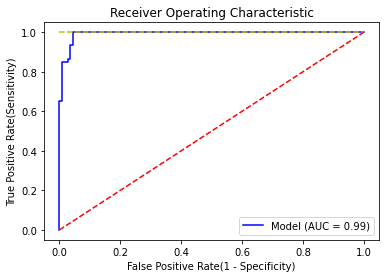

In [41]:
# ROC 곡선 그리기

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc = 'lower right')
plt.show()

### 6. 예측값 병합 및 저장

In [45]:
prob_train = model.predict_proba(X_scaled_minmax_train)
y_train['y_pred'] = pred_train
y_train[['y_prob0', 'y_prob1']] = prob_train
y_train

C:\Users\yusti\AppData\Local\Temp/ipykernel_10108/2182167496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['y_pred'] = pred_train
C:\Users\yusti\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Class,y_pred,y_prob0,y_prob1
131,0,0,0.981014,0.018986
6,0,0,0.768191,0.231809
0,0,0,0.966431,0.033569
269,0,0,0.988880,0.011120
56,1,1,0.203161,0.796839
...,...,...,...,...
515,1,1,0.021270,0.978730
216,1,0,0.895961,0.104039
312,1,1,0.113440,0.886560
11,0,0,0.987405,0.012595


In [46]:
prob_test = model.predict_proba(X_scaled_minmax_test)
y_test['y_pred'] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

C:\Users\yusti\AppData\Local\Temp/ipykernel_10108/10394135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['y_pred'] = pred_test
C:\Users\yusti\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Class,y_pred,y_prob0,y_prob1
541,0,0,0.955893,0.044107
549,0,0,0.970887,0.029113
318,0,0,0.943572,0.056428
183,0,0,0.979370,0.020630
478,1,1,0.001305,0.998695
...,...,...,...,...
425,1,1,0.006201,0.993799
314,1,1,0.067440,0.932560
15,1,1,0.436887,0.563113
510,0,0,0.983410,0.016590


In [47]:
# X_test와 y_test 병합

Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0,0.983410,0.016590


In [48]:
# csv 파일로 내보내기 및 저장

Total_test.to_csv("classfication_test.csv")

## Section 03. 머신러닝 맛보기 - (2) 회귀문제

### 1. 분석 데이터 검토

In [49]:
import pandas as pd
data = pd.read_csv('house_price.csv', encoding='utf-8')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [50]:
print(data.shape)

(17689, 6)


In [51]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

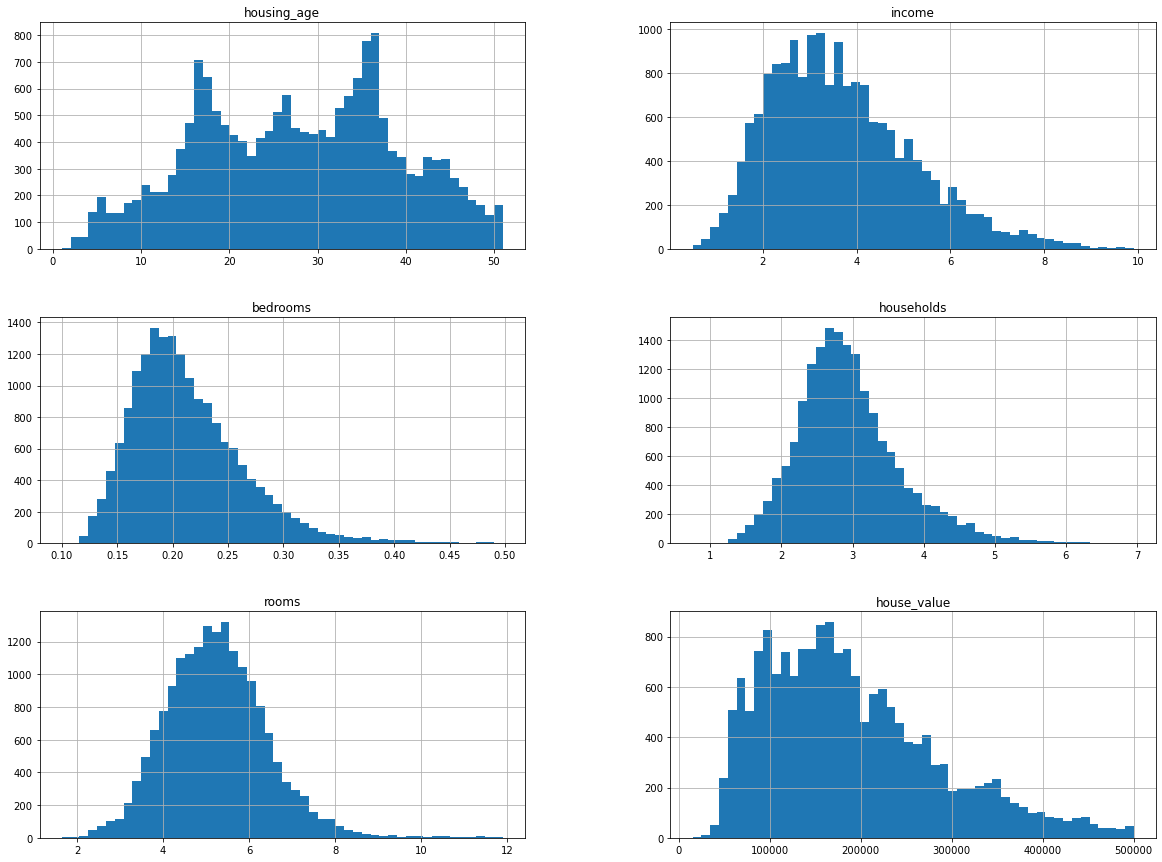

In [52]:
data.hist(bins=50, figsize=(20,15))

### 2. 특성(x)과 레이블(y) 나누기

In [53]:
# 방법1: 특성 이름으로 특성 데이터셋(X) 나누기
X1 = data[['housing_age', 'income', 'bedrooms', 'households', 'rooms']]

# 방법2: 특성 위치값으로 특성 데이터셋(X) 나누기
X2 = data[data.columns[0:5]]

# 방법3: loc 함수로 특성 데이터셋(X) 나누기 (단, 불러올 특성이 연달아 있어야 함.)
X3 = data.loc[:, 'housing_age': 'rooms']

In [54]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

(17689, 5)
(17689, 5)
(17689, 5)


In [55]:
y = data[["house_value"]]

In [56]:
print(y.shape)

(17689, 1)


### 3. train-test 데이터셋 나누기

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42)

In [58]:
print(y_train.mean())
print(y_test.mean())

house_value    189260.967812
dtype: float64
house_value    188391.001357
dtype: float64


### 4. 정규화

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

#### 가. train data의 정규화

In [60]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [61]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [62]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4
count,13266.000000,13266.000000,13266.000000,13266.000000,13266.000000
mean,0.526774,0.337157,0.284682,0.357657,0.335256
std,0.224853,0.161972,0.129011,0.118029,0.117614
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.217083,0.194600,0.280091,0.254470
50%,0.540000,0.313983,0.261866,0.342512,0.330405
75%,0.700000,0.435921,0.352555,0.416829,0.405879
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4
count,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04,1.326600e+04
mean,5.615556e-18,1.588508e-16,7.827508e-16,-1.103026e-16,-3.708213e-16
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.342832e+00,-2.081653e+00,-2.206729e+00,-3.030366e+00,-2.850578e+00
25%,-8.306782e-01,-7.413514e-01,-6.982778e-01,-6.572081e-01,-6.868994e-01
50%,5.882409e-02,-1.430799e-01,-1.768626e-01,-1.283229e-01,-4.124140e-02
75%,7.704259e-01,6.097813e-01,5.261181e-01,5.013487e-01,6.004859e-01
max,2.104679e+00,4.092478e+00,5.544819e+00,5.442457e+00,5.652123e+00


#### 나. test data의 정규화

In [64]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.529984,0.337189,0.284061,0.362482,0.338222
std,0.227852,0.163047,0.127044,0.122663,0.119826
min,0.000000,0.000000,0.044099,0.051525,-0.023437
25%,0.340000,0.213011,0.194452,0.281143,0.254633
50%,0.540000,0.314536,0.260169,0.344791,0.331819
75%,0.700000,0.433109,0.351367,0.424120,0.410090
max,1.000000,0.992462,0.975243,1.011026,0.998799


In [65]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000
mean,0.014279,0.000196,-0.004814,0.040879,0.025222
std,1.013373,1.006675,0.984789,1.039304,1.018846
min,-2.342832,-2.081653,-1.864897,-2.593803,-3.049856
25%,-0.830678,-0.766493,-0.699423,-0.648287,-0.685507
50%,0.058824,-0.139666,-0.190013,-0.109012,-0.029221
75%,0.770426,0.592419,0.516912,0.563130,0.636293
max,2.104679,4.045937,5.352917,5.535878,5.641914


### 5. 모델 학습

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [67]:
# pred_train에 예측값 할당

pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5706921210926265

In [68]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.5826083517811865

In [70]:
# RMSE (선형 모델평가지표)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred_test)
np.sqrt(MSE)

61763.84882543206

In [71]:
# MAE (선형 모델평가지표)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_test)

46218.35635910518

In [72]:
# MSE (선형 모델평가지표)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred_test)

3814773021.730826

In [73]:
# MAEP (기타 선형 모델평가지표)

def MAPE(y_test, pred_test):
    return np.mean(np.abs((y_test - pred_test) / y_test)) * 100
MAPE(y_test, pred_test)

house_value    30.33032
dtype: float64

In [76]:
# MPE (기타 선형 모델평가지표)

def MPE(y_test, pred_test):
    return np.mean((y_test - pred_test) / y_test) * 100
MPE(y_test, pred_test)

house_value   -12.178049
dtype: float64

### 6. 예측값 병합 및 저장

In [77]:
pred_train = model.predict(X_scaled_minmax_train)
y_train[['y_pred']] = pred_train
y_train

C:\Users\yusti\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,house_value,y_pred
17235,56700,30143.543694
14220,101400,199835.492874
3280,271400,272103.037256
15279,88900,28899.099715
14727,95300,113477.567588
...,...,...
11284,142400,115628.685921
11964,134200,77955.022737
5390,225000,137618.822679
860,378200,255862.726626


In [78]:
pred_test = model.predict(X_scaled_minmax_test)
y_test[['y_pred']] = pred_test
y_test

C:\Users\yusti\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,house_value,y_pred
17552,48500,33552.694027
5659,220500,266109.596465
5954,215800,212922.500307
733,390000,290337.891760
10290,155200,135785.644577
...,...,...
7770,185300,262949.818829
1822,328900,226451.743868
811,382400,288121.570093
868,377300,151766.958670


In [79]:
Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
17552,19,1.0481,0.251874,3.670846,4.181818,48500,33552.694027
5659,26,5.8683,0.132936,2.730483,7.172862,220500,266109.596465
5954,37,4.1094,0.177939,2.652582,5.830986,215800,212922.500307
733,16,6.3258,0.169569,3.155340,6.412621,390000,290337.891760
10290,32,2.2950,0.293907,4.188742,3.695364,155200,135785.644577
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,185300,262949.818829
1822,19,3.8819,0.226279,1.897600,4.755200,328900,226451.743868
811,40,5.7143,0.148075,2.704819,6.102410,382400,288121.570093
868,16,2.6250,0.229714,1.910828,5.573248,377300,151766.958670


In [80]:
Total_test.to_csv("regression_test.csv")

## Section 04. 머신러닝 프로세스 - (1) 범주변수의 변환

### 1. 데이터 범주-연속-레이블로 나누기

In [1]:
import pandas as pd
data = pd.read_csv("vote.csv", encoding='utf-8')
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [2]:
X1 = data[['gender', 'region']]
XY = data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention', 'vote', 'parties']]

### 2. 범주형 변수의 One-hot-encoding 변환

In [3]:
# 먼저 숫자를 문자로 변환하는 게 좋음

X1['gender'] = X1['gender'].replace([1,2], ['male','female'])
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])

C:\Users\yusti\AppData\Local\Temp/ipykernel_5652/239722178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['gender'] = X1['gender'].replace([1,2], ['male','female'])
C:\Users\yusti\AppData\Local\Temp/ipykernel_5652/239722178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])


In [4]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [5]:
# one-hot-encoding으로 변환

X1_dum = pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


### 3. 자료 통합 및 저장하기

In [6]:
# 변수 통합하여 한 데이터셋으로 통합

Fvote = pd.concat([X1_dum, XY], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [7]:
Fvote.to_csv('Fvote.csv', index=False, sep=',', encoding='utf-8')

## Section 05. 머신러닝 프로세스 - (2) 데이터셋 분할과 모델검증

### 1. 특성치(x), 레이블(y) 나누기

In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('Fvote.csv', encoding='utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [9]:
# 방법1 : 특성이름으로 데이터셋 나누기
X = data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
          'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 'age', 
          'score_gov', 'score_progress', 'score_intention']]

# 방법2 : 특성 위치값으로 데이터셋 나누기
X = data[data.columns[0:13]]

# 방법3 : loc 함수로 데이터셋 나누기 (단, 불러올 특성이 연달아 있어야 함)
X = data.loc[:, 'gender_female':'score_intention']

In [10]:
y = data[['vote']]

### 2. train-test 데이터셋 나누기

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(158, 13)
(53, 13)


### 3. 모델 적용

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### 가. 랜덤 없는 교차검증 (cross_val_score)

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print("5개 테스틑 셋 정확도:", scores)
print("정확도 평균:", scores.mean())

5개 테스틑 셋 정확도: [0.71875    0.6875     0.8125     0.58064516 0.80645161]
정확도 평균: 0.7211693548387096


#### 나. 랜덤 있는 교차검증 (K-Fold)

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=kfold)
print("5개 폴드의 정확도:", score)

5개 폴드의 정확도: [0.71875    0.6875     0.625      0.70967742 0.77419355]


#### 다. 임의분할 교차검증

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, random_state=42)
score = cross_val_score(model, X_train, y_train, cv=shuffle_split)
print("교차검증 정확도:", score)

교차검증 정확도: [0.73417722 0.69620253 0.70886076 0.73417722 0.65822785 0.67088608
 0.72151899 0.65822785 0.69620253 0.70886076]


### 4. train-validity-test 분할과 교차검증

In [20]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=2)

In [21]:
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("교차검증 정확도:", score)
print("정확도 평균:", scores.mean())

교차검증 정확도: [0.73417722 0.69620253 0.70886076 0.73417722 0.65822785 0.67088608
 0.72151899 0.65822785 0.69620253 0.70886076]
정확도 평균: 0.652536231884058


In [22]:
model.score(X_valid, y_valid)

0.65

In [23]:
model.score(X_test,y_test)

0.6981132075471698

## Section 06. 머신러닝 프로세스 - (3) 데이터 정규화

### 1. 데이터 불러오기 및 확인

In [1]:
import pandas as pd
data = pd.read_csv('Fvote.csv', encoding = 'utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [2]:
data.describe()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>,
        <AxesSubplot:title={'center':'region_Honam'}>],
       [<AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngnam'}>,
        <AxesSubplot:title={'center':'edu'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>,
        <AxesSubplot:title={'center':'score_progress'}>],
       [<AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>, <AxesSubplot:>]],
      dtype=object)

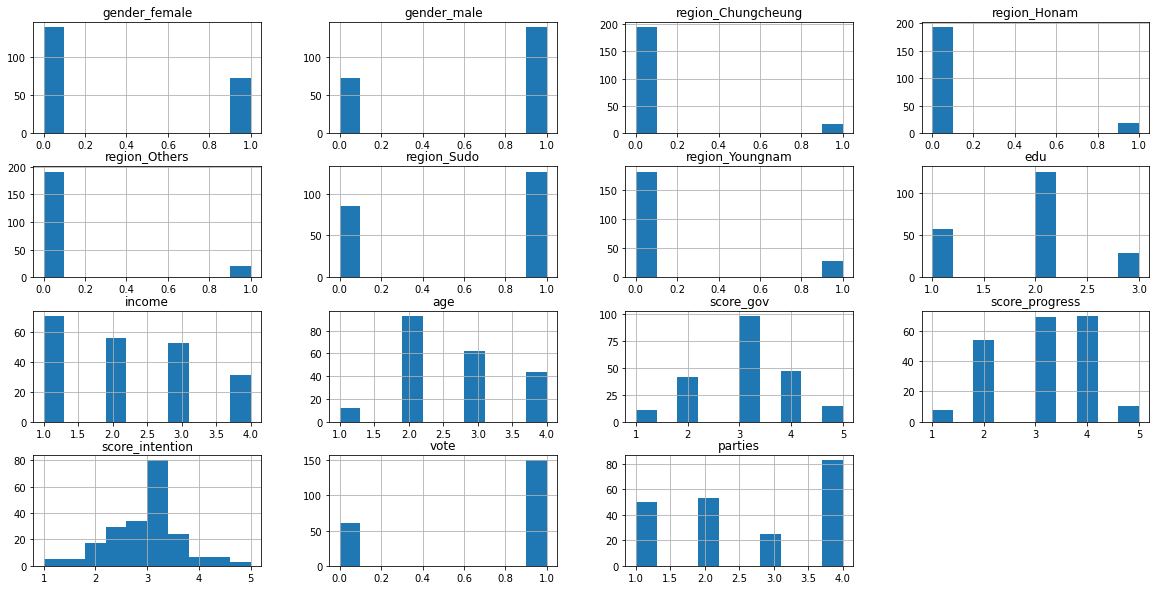

In [4]:
data.hist(figsize=(20,10))

### 2. 특성(x)과 레이블(y) 나누기

In [8]:
X = data.loc[:, 'gender_female':'score_intention']
y = data[['vote']]

In [9]:
print(X.shape)
print(y.shape)

(211, 13)
(211, 1)


### 3. train-test 데이터셋 나누기

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,   #레이블이 범주형이므로stratify=y를 사용해 유사 비율로 분리
                                                    random_state=42)   

In [11]:
# 투표여부 비율이 유사한지 확인

print(y_train.mean())
print(y_test.mean())

vote    0.708861
dtype: float64
vote    0.716981
dtype: float64


### 4. 연속형 특성의 Scaling

#### 가. Min-Max 스케일링

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [13]:
scaler_minmax.fit(X_train)   #fit은 train 데이터에만
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [14]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.396226,0.603774,0.037736,0.188679,0.075472,0.584906,0.113208,0.424528,0.433962,0.540881,0.533019,0.537736,0.478302
std,0.493793,0.493793,0.192380,0.394998,0.266679,0.497454,0.319878,0.316170,0.355572,0.279089,0.240381,0.226789,0.163939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.500000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


#### 나. Standardization 스케일링

In [16]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

In [17]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [18]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,8.432074e-18,7.307797e-17,-2.810691e-17,1.127790e-16,-2.318820e-17,-1.405346e-18,-8.853677e-17,6.201087e-17,-8.151004e-17,-2.389088e-17,3.934968e-17,4.356571e-17,-4.863374e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-1.884881e+00,-2.167287e+00,-2.122900e+00,-2.558829e+00
25%,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-7.525190e-01,-8.338316e-01,-1.100283e+00,-6.833719e-01
50%,-6.903879e-01,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,-1.664780e-01,-1.863380e-01,-3.375836e-02,-7.766706e-02,1.203955e-01
75%,1.448461e+00,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,7.729337e-01,3.798429e-01,1.033006e+00,9.449492e-01,6.562405e-01
max,1.448461e+00,6.903879e-01,3.087610e+00,4.068852e+00,2.979094e+00,8.143451e-01,2.422719e+00,1.806199e+00,1.712345e+00,1.512205e+00,2.099770e+00,1.967565e+00,2.799620e+00


In [20]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.157080,-0.157080,-0.195140,0.568310,-0.085501,-0.033413,-0.091762,-0.039057,0.117118,-0.047463,0.107135,0.076690,0.004127
std,1.056149,1.056149,0.656302,1.704266,0.883978,1.015962,0.907008,1.013804,1.002085,0.948089,1.025719,0.927672,0.878457
min,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-1.884881,-2.167287,-2.122900,-1.487139
25%,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-0.752519,-0.033758,-0.077667,-0.683372
50%,-0.690388,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,-0.166478,0.379843,-0.033758,-0.077667,0.120396
75%,1.448461,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,0.772934,0.379843,1.033006,0.944949,0.388318
max,1.448461,0.690388,3.087610,4.068852,2.979094,0.814345,2.422719,1.806199,1.712345,1.512205,2.099770,1.967565,2.263775


### 5. 모델 학습

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### 가. Min-Max 정규화 데이터 적용 결과

In [26]:
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

C:\Users\yusti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7278481012658228

In [27]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.7169811320754716

In [24]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[  9  37]
 [  6 106]]


In [28]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 2 13]
 [ 2 36]]


### 나. Standardize 정규화 데이터 적용결과

In [29]:
model.fit(X_scaled_standard_train, y_train)
pred_train = model.predict(X_scaled_standard_train)
model.score(X_scaled_standard_train, y_train)

C:\Users\yusti\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.740506329113924

In [30]:
pred_test = model.predict(X_scaled_standard_test)
model.score(X_scaled_standard_test, y_test)

0.6792452830188679

In [31]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 12  34]
 [  7 105]]


In [32]:
confusion_train = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 2 13]
 [ 2 36]]


## Section 07. 머신러닝 프로세스 - (4) 모델훈련과 세부튜닝

### 1. 데이터 불러오기 및 데이터셋 분할

In [4]:
import warnings
warnings.filterwarnings("ignore")   #분석결과 외에 불필요한 내용이 나오지 않도록 하기
import pandas as pd
data = pd.read_csv('Fvote.csv', encoding='utf-8')

In [5]:
X = data[data.columns[1:13]]
y = data[['vote']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

### 2. Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,   #cv는 교차검증 횟수
                          return_train_score=True)    #디폴트는 False이나 정확도 결과를 제시하기 위해 True
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [10]:
print("Best Parameter: {}".format(grid_search.best_params_))   #정확도가 가장 높은 하이퍼파라미터(C)
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))   #그 때의 정확도

Best Parameter: {'C': 10}
Best Cross-validity Score: 0.727


In [11]:
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.679


In [12]:
# 그리드서치 상세 결과값 (하이퍼파라미터별, cross validation별)

result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013059,0.008798,0.002120,0.001371,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.006633,0.002461,0.001874,0.000732,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.022956,0.015556,0.002501,0.001123,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.038070,0.007276,0.004026,0.002513,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.044355,0.014903,0.003685,0.002047,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.039518,0.003571,0.003043,0.001078,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


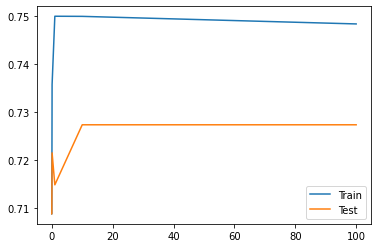

In [13]:
# 도표로 하이퍼파라미터별 정확도 살펴보기

import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

### 3. Random Search

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C': randint(low=0.001, high=100)}   #0.001과 100 랜덤하게 C 결정

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
random_search = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions = param_distribs, cv=5,
                                  #n_iter=100, 랜덤횟수 디폴트=10
                                  return_train_score=True)   #디폴트는 False이나 정확도 결과를 제시하기 위해 True
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A459492B50>},
                   return_train_score=True)

In [17]:
print("Best Parameter: {}".format(random_search.best_params_))   #정확도가 가장 높은 하이퍼파라미터(C)
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))   #그 때의 정확도

Best Parameter: {'C': 23}
Best Cross-validity Score: 0.727


In [18]:
print("Test set score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set score: 0.679


In [19]:
# 랜덤탐색 상세 결과값 (하이퍼파라미터별, cv별)

result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.066373,0.033852,0.002909,0.001883,23,{'C': 23},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.042083,0.023287,0.002095,0.000842,47,{'C': 47},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.050783,0.022350,0.002531,0.000454,39,{'C': 39},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.027451,0.012572,0.003219,0.002534,56,{'C': 56},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.049679,0.013040,0.003630,0.001643,21,{'C': 21},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.054876,0.008828,0.004646,0.002205,48,{'C': 48},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
6,0.051540,0.017942,0.003518,0.000561,91,{'C': 91},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.046790,0.027598,0.003551,0.001556,47,{'C': 47},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
8,0.056035,0.019830,0.003087,0.001507,84,{'C': 84},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.038903,0.006495,0.002580,0.000794,63,{'C': 63},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


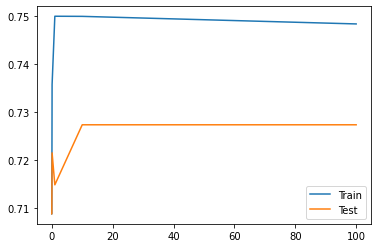

In [20]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

## Section 08. 머신러닝 프로세스 - (5) 모델평가

In [21]:
Final_model = LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [22]:
# 훈련데이터의 정확도

pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [23]:
# 테스트데이터의 정확도

pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [24]:
# 훈련데이터의 혼동행렬

from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 12  34]
 [  7 105]]


In [25]:
# 훈련데이터의 분류 모델 평가 결과

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [26]:
# 테스트데이터의 정확도

confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 3 12]
 [ 5 33]]


In [27]:
# 테스트데이터의 분류 모델 평가 결과

from sklearn.metrics import classification_report
cfreport_test = classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [29]:
# ROC

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

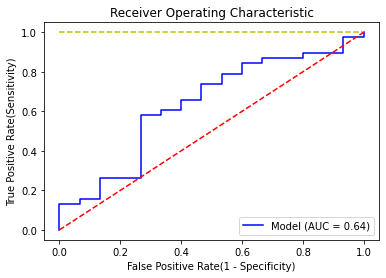

In [30]:
# ROC Curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'%roc_auc)
plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()

## Section 09. 머신러닝 프로세스 - (6) 다중분류

In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('Fvote.csv', encoding='utf-8')

In [32]:
X = data[data.columns[1:13]]
y = data[['parties']]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# 지지정당의 예측범주 predict에 저장

pred_train = model.predict(X_train)
model.score(X_train, y_train)

0.6139240506329114

In [36]:
pred_test = model.predict(X_test)
model.score(X_test, y_test)

0.5283018867924528

In [37]:
# 훈련데이터의 혼동행렬

from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[21  2  3 11]
 [ 1 25  2 12]
 [ 6  2  5  6]
 [ 7  8  1 46]]


In [38]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 6  1  2  4]
 [ 1  9  1  2]
 [ 1  2  1  2]
 [ 2  5  2 12]]


In [39]:
# 그리트탐색을 통해 하이퍼파라미터 값 찾기

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [40]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [42]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.1}
Best Cross-validity Score: 0.544


In [43]:
print("Test set Score:{:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score:0.585


In [44]:
# 랜덤탐색

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C': randint(low=0.001, high=100)}

In [45]:
random_search = RandomizedSearchCV(LogisticRegression(), 
                                  param_distributions = param_distribs, cv=5,
                                  # n_iters=100, 랜덤횟수 디폴트=10
                                  return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A4595C2EE0>},
                   return_train_score=True)

In [46]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 1}
Best Cross-validity Score: 0.538


In [47]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.528
